C:\Users\srlit\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Mean Squared Error: 0.0
R^2 Score: nan
Predicted Prices: [330000. 395000.]


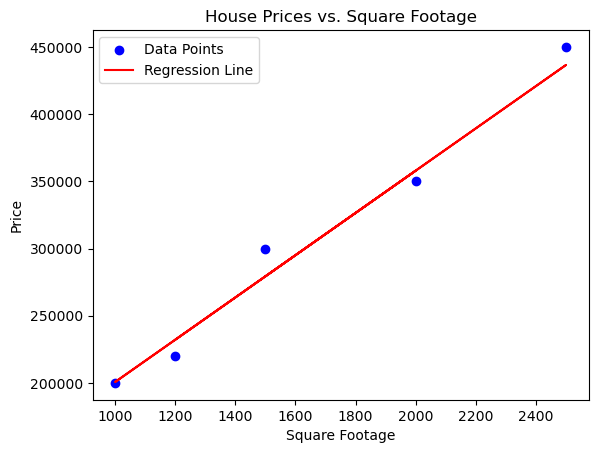

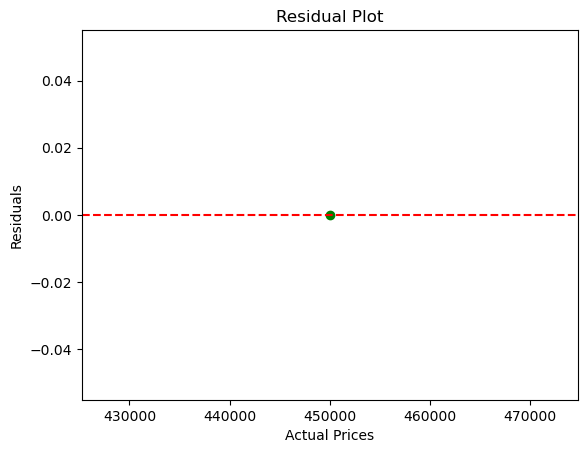

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Sample data (replace this with your actual dataset)
data = {
    'square_footage': [1500, 2500, 1000, 2000, 1200],
    'bedrooms': [3, 4, 2, 3, 2],
    'bathrooms': [2, 3, 1, 2, 1],
    'price': [300000, 450000, 200000, 350000, 220000]
}

df = pd.DataFrame(data)

# Feature matrix (X) and target vector (y)
X = df[['square_footage', 'bedrooms', 'bathrooms']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Predict prices for new data
new_data = pd.DataFrame({
    'square_footage': [1800, 2200],
    'bedrooms': [3, 4],
    'bathrooms': [2, 2]
})

new_predictions = model.predict(new_data)
print(f'Predicted Prices: {new_predictions}')

# Visualization

# Scatter plot of the data points
plt.scatter(X['square_footage'], y, color='blue', label='Data Points')

# Plot the regression line (for square footage)
model_single_feature = LinearRegression()
model_single_feature.fit(X_train[['square_footage']], y_train)
plt.plot(X['square_footage'], model_single_feature.predict(X[['square_footage']]), color='red', label='Regression Line')

plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('House Prices vs. Square Footage')
plt.legend()
plt.show()

# Plot the residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
